In [ ]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import statsmodels.api as sm
print("Setup Complete")

Setup Complete


In [ ]:
file1="MR-3.csv"
#fileread=pd.read_csv(file1,sheet_name="Sheet2",index_col=1,header=1)
fileread = pd.read_csv(file1,skiprows=0,parse_dates=True)
df=pd.DataFrame(fileread)

print(df.columns)
# df.dropna()
# df = df.iloc[1:].reset_index(drop=True).drop_duplicates(subset='Linked Purchase ID').set_index("Linked Purchase ID")
print(df.isnull().sum())
# df= df.drop(df[df['Gross Margin'] == "nan"].index)
# df = df.drop(df[df['Gross Margin'] == '#DIV/0!'].index)
# df = df.drop(df[df['Gross Margin %'] == '100%'].index)
df['Gross Margin'] = df['Gross Margin'].astype(float)
df["Gross Margin %"] = df["Gross Margin %"].astype(float) #str.replace("%", "")
df = df.sort_values(by = ['Gross Margin %'])
print(df.shape)
print(df['Purchasing Qty (MT)'].shape)
df.head()
df.tail()

Index(['data', 'jodl_jopl', 'child_order_id', 'Tagged Purchase ID', 'sku_id',
       'ops_poc', 'sku_description', 'invoice_no', 'invoice_date',
       'total_invoiced_qty', 'total_cancelled_qty', 'total_rejected_qty',
       'final_invoiced_price_per_unit', 'base_invoiced_value',
       'total_invoiced_value_gmv', 'parent_order_id', 'business_unit_pid',
       'order_type_pid', 'transaction_at_cid', 'transaction_via_pid',
       'transaction_type_pid', 'payment_type', 'buyer_id', 'buyer_name',
       'actual_seller_id', 'actual_seller_name', 'material_code', 'uom',
       'opportunity_id', 'sales_spoc', 'total_short_closed_qty',
       'invoiced_price_per_unit_rate', 'upfront_discount_value_per_unit',
       'gst', 'final_execution_on_oms', 'order_date', 'sf_opportunity_id',
       'sf_sales_channel', 'oms_order_id', 'sf_auto_state', 'sf_gstin',
       'sf_customer_type', 'transaction_nature', 'payment_sheet_gst', 'cgst',
       'sgst', 'igst', 'sf_business_unit', 'purchase_order_id',

,data,jodl_jopl,child_order_id,Tagged Purchase ID,sku_id,ops_poc,sku_description,invoice_no,invoice_date,total_invoiced_qty,...,Total Purchasing Value_gmv,Purchasing Price/Bag,Difference (Selling -Buying),JSW NT Incentive/Bag,JSW Trade PD,JSW Trade Incentive,JOPL PUF,Per Bag Margin,Gross Margin,Gross Margin %
1313,current,JODL,S16145,P16122,SKUR-S16145-1,Manideep,Blended Cement Concreel HD Cement JSW,JODLJUN23-24/469,15/06/2023,31.0,...,179800.0,290.0,2.01,NaN,50.0,18.0,NaN,70.01,43404.0,23.974
1314,current,JODL,S15707,P15668,SKUR-S15707-1,Manideep,Blended Cement Concreel HD Cement JSW,JODLMAY23-24/775,28/05/2023,36.0,...,201600.0,280.0,0.00,NaN,50.0,18.0,NaN,68.00,48960.0,24.286
1315,current,JODL,S16342,P16313,SKUR-S16342-1,Manideep,Blended Cement Concreel HD Cement JSW,JODLMH0623/0738,23/06/2023,32.0,...,182400.0,285.0,5.00,NaN,50.0,18.0,NaN,73.00,46718.0,25.172
1316,current,JODL,S16448,P16426,SKUR-S16448-1,Manideep,Blended Cement Concreel HD Cement JSW,JODLMH0623/0943,30/06/2023,31.0,...,173600.0,280.0,5.00,NaN,50.0,18.0,NaN,73.00,45263.0,25.615
1317,current,JODL,S15529,P15499,SKUR-S15529-1,Manideep,Blended Cement Concreel HD Cement JSW,JODLMAY23-24/828,30/05/2023,35.0,...,199500.0,285.0,10.00,NaN,50.0,18.0,NaN,78.00,54601.0,26.441


In [ ]:
temp_df = df.loc[:, 'Gross Margin %']
temp_df = temp_df.dropna()
temp_df = temp_df.drop(temp_df[temp_df.iloc[:] == '#DIV/0!'].index)
one_df = df[['Gross Margin %','invoice_date']]
two_df = df[['Gross Margin %','invoice_date',"Cement Type"]]
print(one_df.shape)
one_df = one_df.dropna()
print(one_df.shape)
# print(one_df[one_df.iloc[:] == '#DIV/0!'])
# one_df = one_df.drop(one_df[one_df.iloc[:] == '#DIV/0!'].index)
# print(one_df)

(1318, 2)
(1318, 2)


In [ ]:
temp_df.head(10)

0   -32.410
1   -25.227
2   -25.227
3   -23.437
4   -21.394
5   -19.733
6   -19.732
7   -13.125
8    -5.096
9    -4.482
Name: Gross Margin %, dtype: float64

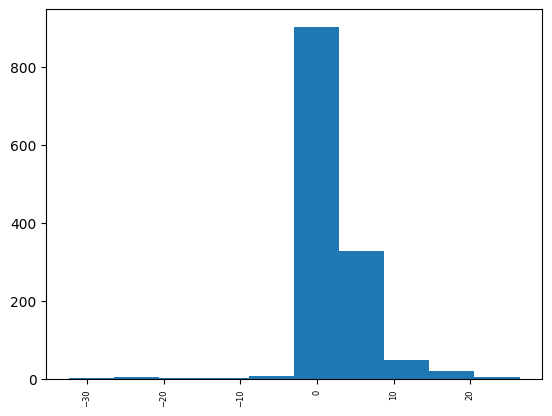

In [ ]:
temp_df = temp_df.astype(float)
plt.hist(temp_df, bins = 10)
plt.xticks(rotation = 'vertical', fontsize=6)
plt.show()
#temp_df distribution

In [ ]:
print(temp_df.mean())
print(temp_df.std())
print(temp_df.mean()+3*temp_df.std())
print(temp_df.mean()-3*temp_df.std())

2.667748861911988
4.0419519059769
14.793604579842688
-9.458106856018711


In [ ]:
from matplotlib.cbook import boxplot_stats
Q1 = temp_df.quantile(0.25)
Q3 = temp_df.quantile(0.75)
IQR = Q3-Q1
print(Q3+1.5*IQR)
print((Q1-1.5*IQR))
df_final = temp_df[~((temp_df<(Q1-1.5*IQR)) | (temp_df>(Q3+1.5*IQR)))]
boxplot_stats(df_final)
print(df_final.head())

8.9125
-4.419499999999999
10   -4.110
11   -4.000
12   -3.562
13   -3.467
14   -3.082
Name: Gross Margin %, dtype: float64


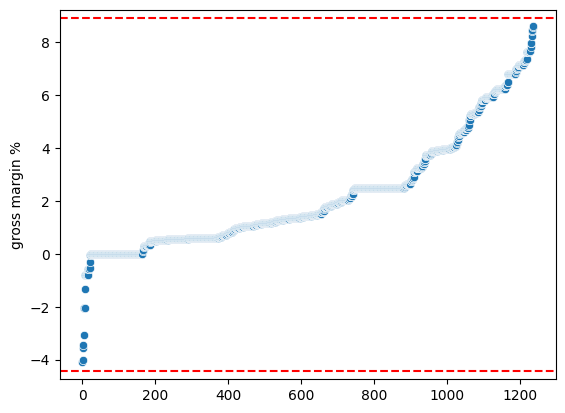

In [ ]:
sns.scatterplot(df_final.to_numpy())
line1_y = (Q1-1.5*IQR)
line2_y = (Q3+1.5*IQR)
# Plot the first boundary line
plt.axhline(line1_y, color='red', linestyle='--')
plt.ylabel("gross margin %")
# Plot the second boundary line
plt.axhline(line2_y, color='red', linestyle='--')

temp_df_un = temp_df.copy()


[{'mean': 2.667748861911988,
  'iqr': 3.3329999999999997,
  'cilo': 1.3678624084669657,
  'cihi': 1.6561375915330343,
  'whishi': 8.596,
  'whislo': -4.11,
  'fliers': array([-32.41 , -25.227, -25.227, -23.437, -21.394, -19.733, -19.732,
         -13.125,  -5.096,  -4.482,   9.   ,   9.   ,   9.11 ,   9.11 ,
           9.111,   9.231,   9.341,   9.364,   9.565,   9.867,   9.867,
           9.867,   9.913,   9.913,   9.957,  10.002,  10.005,  10.005,
          10.006,  10.234,  10.234,  10.408,  10.552,  10.552,  11.078,
          11.32 ,  12.3  ,  12.315,  12.316,  12.331,  12.468,  12.633,
          12.767,  12.767,  12.768,  12.768,  12.769,  12.769,  13.305,
          13.305,  13.421,  13.421,  13.509,  13.509,  13.721,  13.721,
          13.723,  14.87 ,  16.375,  16.375,  16.375,  16.375,  16.375,
          16.375,  16.377,  16.377,  16.891,  16.891,  16.892,  16.892,
          16.892,  16.892,  17.042,  17.042,  18.191,  18.191,  19.449,
          23.974,  24.286,  25.172,  25.61

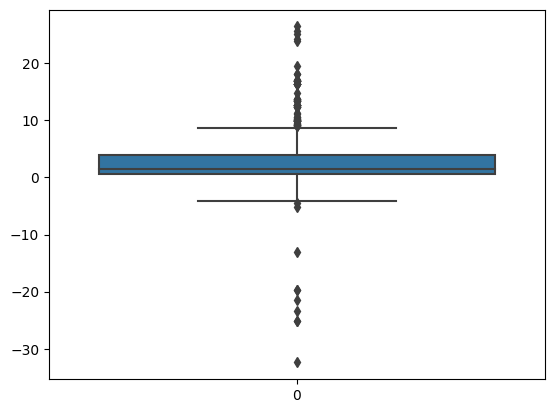

In [ ]:
sns.boxplot(temp_df)

boxplot_stats(temp_df)

In [ ]:
# print(one_df.shape)
# print(one_df.columns)
# print(one_df.dtypes)
# Convert date column to datetime format
#df['invoice_date'] = pd.to_datetime(df['invoice_date'], format = '%d/%m/%Y')
#df.sort_values(by = ['invoice_date'], inplace = True)
# # # Extract month information from date column
# one_df['month'] = one_df['invoice_date'].dt.month
# one_df['month'].dtype
# # # Modify catplot to columnize according to the month
# sns.catplot(data=one_df,y='Gross Margin %',x='invoice_date',col='month', aspect=.5)
# plt.show()

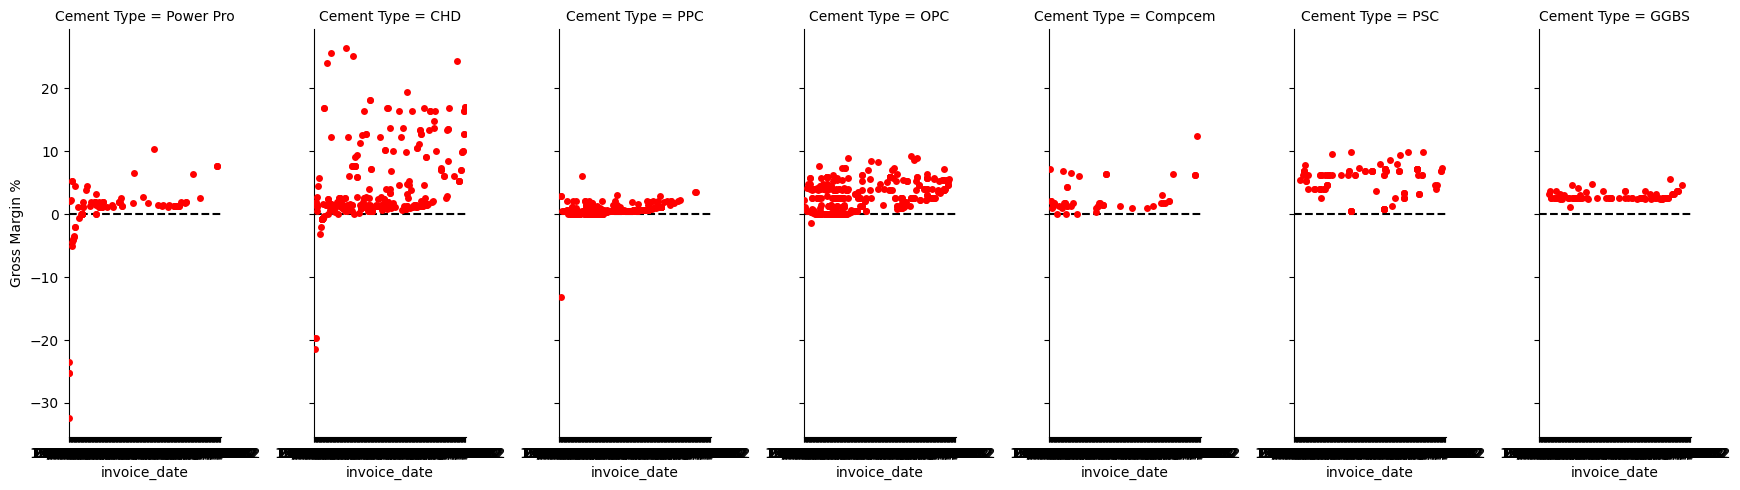

In [ ]:
# print(two_df.shape)
# print(two_df.columns)
# print(two_df.dtypes)
sns.catplot(data=two_df,y='Gross Margin %',x='invoice_date',col='Cement Type', aspect=.5, color = 'red')
for ax in plt.gcf().axes:
    ax.axhline(0, color='black', linestyle='--')
plt.show()

<Axes: >

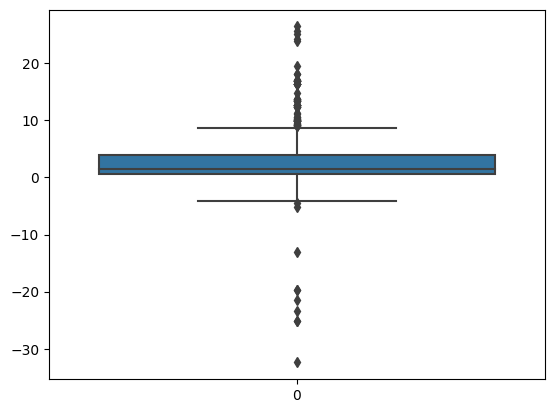

In [ ]:
sns.boxplot(temp_df)

In [ ]:
# print(temp_df.mean()+3*temp_df.std())
# print(temp_df.mean()-3*temp_df.std())
# print(np.percentile(temp_df,97))
# print(np.percentile(temp_df,3))

In [ ]:
# data_df= (temp_df - temp_df.mean()) / temp_df.std()

# # Identify outliers using a threshold (e.g., Z-score > 3)
# outliers = data_df[data_df > 3]

# # Print the outliers
# print(data_df)
# print(outliers)

In [ ]:
from sklearn.ensemble import IsolationForest
temp_df = temp_df.to_numpy()
temp_df.sort()
iForest = IsolationForest(n_estimators=500, contamination=0.03, bootstrap=True,verbose=1)
iForest.fit(temp_df.reshape(-1, 1))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished


IsolationForest(bootstrap=True, contamination=0.03, n_estimators=500, verbose=1)

In [ ]:
print(np.percentile(temp_df,75))
print(np.percentile(temp_df,25))
q1=(np.percentile(temp_df,75))
q3=np.percentile(temp_df,25)
iqr=q3-q1
print(q1+1.5*iqr)#lower Bound
print(q3-1.5*iqr)#upper Bound

3.913
0.58
-1.0864999999999996
5.5794999999999995


In [ ]:
pred = iForest.predict(temp_df.reshape(-1,1))
np.where(pred == -1)[0].shape

(40,)

In [ ]:
temp_df[np.where(pred == -1)]

array([-32.41 , -25.227, -25.227, -23.437, -21.394, -19.733, -19.732,
       -13.125,  -5.096,  -4.482,  -4.11 ,  -4.   ,  -3.562,  -3.467,
        -3.082,  14.87 ,  16.375,  16.375,  16.375,  16.375,  16.375,
        16.375,  16.377,  16.377,  16.891,  16.891,  16.892,  16.892,
        16.892,  16.892,  17.042,  17.042,  18.191,  18.191,  19.449,
        23.974,  24.286,  25.172,  25.615,  26.441])

In [ ]:
df.iloc[np.where(pred == -1)].to_csv('outliers.csv')

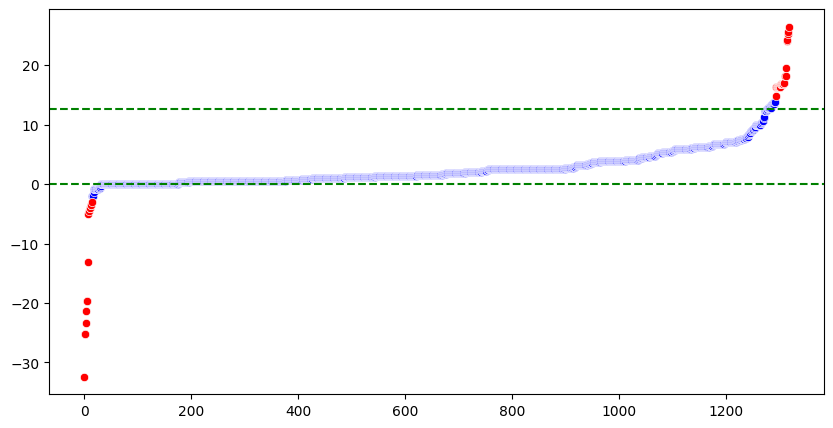

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(y = temp_df[np.where(pred == 1)], x = np.where(pred == 1)[0], color = 'blue')
sns.scatterplot(y = temp_df[np.where(pred == -1)], x = np.where(pred == -1)[0], color = 'red')

#line1_y =temp_df.mean()+3*temp_df.std()
#line2_y=temp_df.mean()-2*temp_df.std()

# line3_y = round(temp_df.shape[0]*0.97)
# line4_y = round(temp_df.shape[0]*0.03)

line3_y=np.percentile(temp_df, 97)
line4_y=np.percentile(temp_df, 3)

# plt.axhline(line1_y, color='red', linestyle='--')
# plt.axhline(line2_y, color='red', linestyle='--')
plt.axhline(line3_y, color='green', linestyle='--')
plt.axhline(line4_y, color='green', linestyle='--')
plt.show()

# sns.scatterplot(x=temp_df[np.where(pred == 1)], y=np.where(pred == 1)[0])

In [ ]:
# df.iloc[np.where(pred == -1)]

In [ ]:
#do pairplot ,anomly values and anomoly and change outliers values according to the estimator.

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
ground_truth = np.ones(len(temp_df), dtype=int)
print(temp_df.shape)
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.03)
y_pred = clf.fit_predict(temp_df.reshape(-1,1))
n_errors = (y_pred != ground_truth).sum()
# X_scores = clf.negative_outlier_factor_
print(n_errors)
# print(len(X_scores))

(1318,)
40


In [ ]:
print(temp_df[np.where(y_pred == -1)].shape)

(40,)


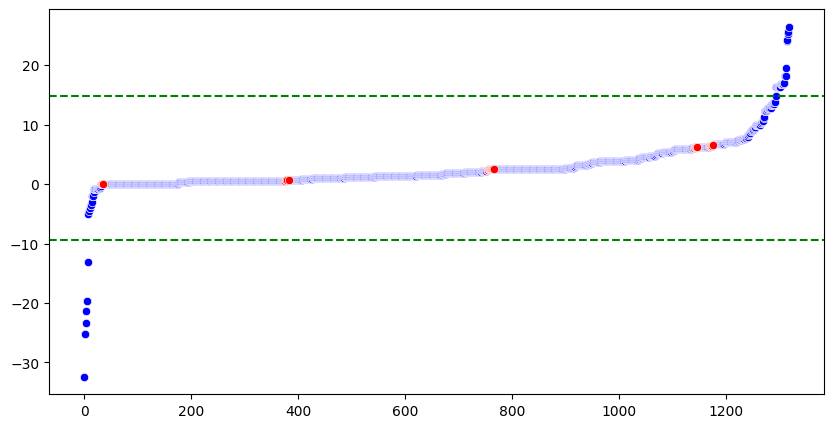

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(y = temp_df[np.where(y_pred == 1)], x = np.where(y_pred == 1)[0], color = 'blue')
sns.scatterplot(y = temp_df[np.where(y_pred == -1)], x = np.where(y_pred == -1)[0], color = 'red')

line1_y =temp_df.mean()+3*temp_df.std()
line2_y=temp_df.mean()-3*temp_df.std()

# line3_y = round(temp_df.shape[0]*0.97)
# line4_y = round(temp_df.shape[0]*0.03)

line3_y=np.percentile(temp_df, 97)
line4_y=np.percentile(temp_df, 3)

# plt.axhline(line1_y, color='red', linestyle='--')
# plt.axhline(line2_y, color='red', linestyle='--')
plt.axhline(line1_y, color='green', linestyle='--')
plt.axhline(line2_y, color='green', linestyle='--')

plt.show()
# sns.scatterplot(x=temp_df[np.where(pred == 1)], y=np.where(pred == 1)[0])

In [ ]:
temp_df[np.where(y_pred == -1)]

array([-0.037, -0.037, -0.012, -0.012, -0.007,  0.593,  0.596,  0.597,
        0.597,  0.606,  2.402,  2.402,  2.439,  2.461,  2.462,  2.486,
        2.487,  2.487,  2.487,  2.487,  2.487,  2.487,  2.487,  2.489,
        6.122,  6.173,  6.173,  6.173,  6.196,  6.196,  6.196,  6.336,
        6.336,  6.366,  6.366,  6.372,  6.372,  6.372,  6.494,  6.494])

In [ ]:
data1=pd.read_csv("outliers.csv")
data1=pd.DataFrame(data1)
data1.columns

columns_needed=['data','child_order_id','invoice_date','buyer_name','actual_seller_name','uom','credit_days','Purchasing UOM','Channel (T/NT)','Selling Price/Bag','Product Type','Invoiced Month','Seller Source','Brand of Cement','Difference (Selling -Buying)','Purchasing Qty (MT)','JSW NT Incentive/Bag', 'JSW Trade PD', 'JSW Trade Incentive',
       'JOPL PUF', 'Per Bag Margin', 'Gross Margin', 'Gross Margin %','Cement Type']
temp2_df=df[columns_needed]
print(temp2_df.shape)
print(len(columns_needed))
print(df['Gross Margin %'].dtype)

(1318, 24)
24
float64


(49, 24)


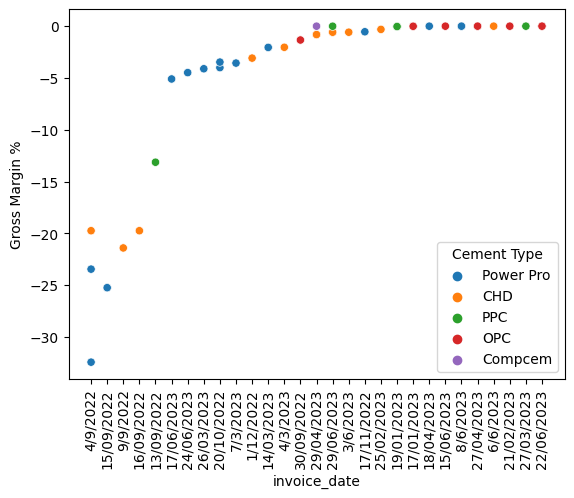

In [ ]:
temp3_df=temp2_df[temp2_df['Gross Margin %']<0]

# print(temp3_df)
print(temp3_df.shape)
sns.scatterplot(data=temp3_df,x='invoice_date',y='Gross Margin %',hue='Cement Type')
plt.xticks(rotation=90)
plt.show()

In [ ]:
temp3_df = temp3_df.sort_values(by = 'invoice_date')

In [ ]:
temp3_df['invoice_date']

14     1/12/2022
7     13/09/2022
16    14/03/2023
15    14/03/2023
39    15/06/2023
1     15/09/2022
2     15/09/2022
5     16/09/2022
34    17/01/2023
35    17/01/2023
8     17/06/2023
30    17/11/2022
38    18/04/2023
32    19/01/2023
33    19/01/2023
13    20/10/2022
11    20/10/2022
44    21/02/2023
47    22/06/2023
48    22/06/2023
9     24/06/2023
31    25/02/2023
10    26/03/2023
45    27/03/2023
42    27/04/2023
46    27/04/2023
37    29/04/2023
24    29/04/2023
26    29/04/2023
25    29/04/2023
23    29/04/2023
22    29/04/2023
21    29/04/2023
20    29/04/2023
19    29/04/2023
28    29/06/2023
36    29/06/2023
27    29/06/2023
29      3/6/2023
18    30/09/2022
17      4/3/2023
6       4/9/2022
3       4/9/2022
0       4/9/2022
43      6/6/2023
12      7/3/2023
40      8/6/2023
41      8/6/2023
4       9/9/2022
Name: invoice_date, dtype: object

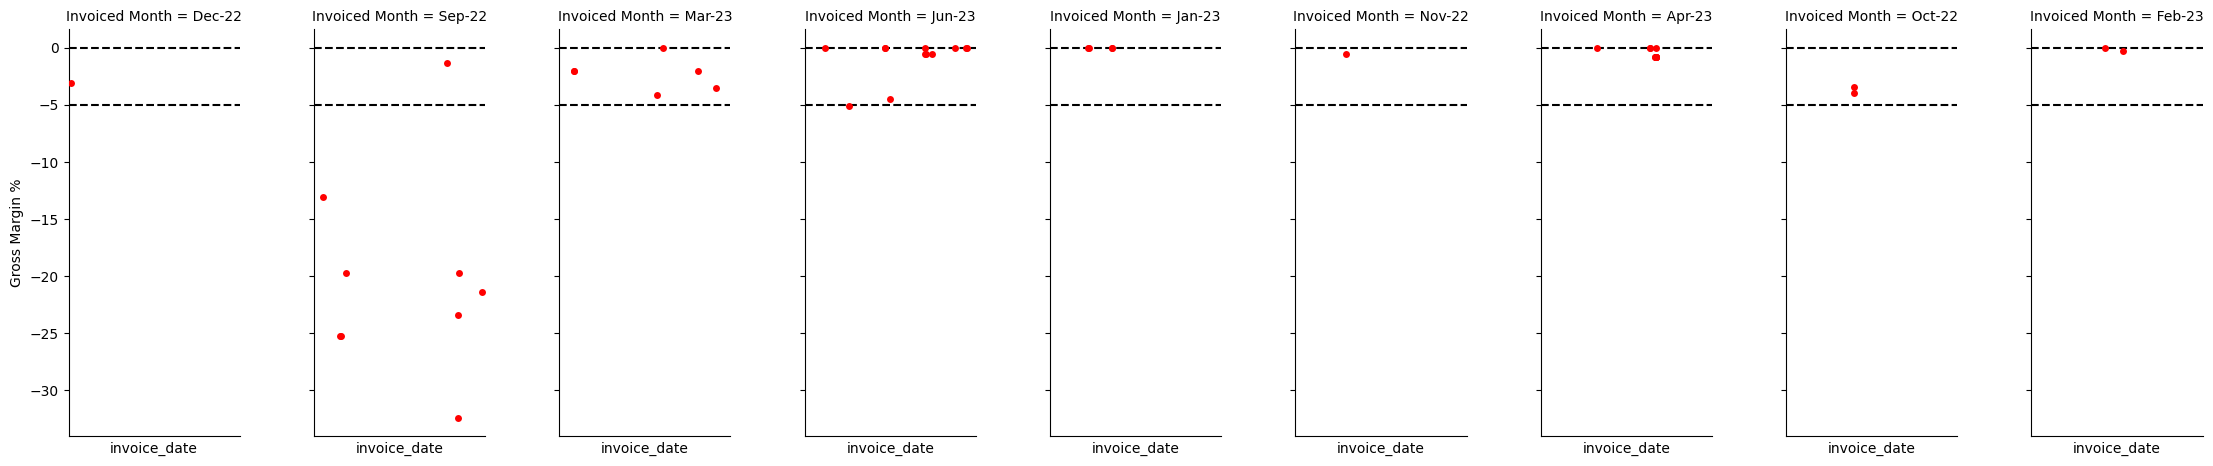

In [ ]:
sns.catplot(data=temp3_df,y='Gross Margin %',x='invoice_date',col='Invoiced Month', aspect=.5, color = 'red')

for ax in plt.gcf().axes:
    ax.axhline(0, color='black', linestyle='--')
    ax.axhline(-5, color='black', linestyle='--')
    ax.set_xticks([])
plt.show()

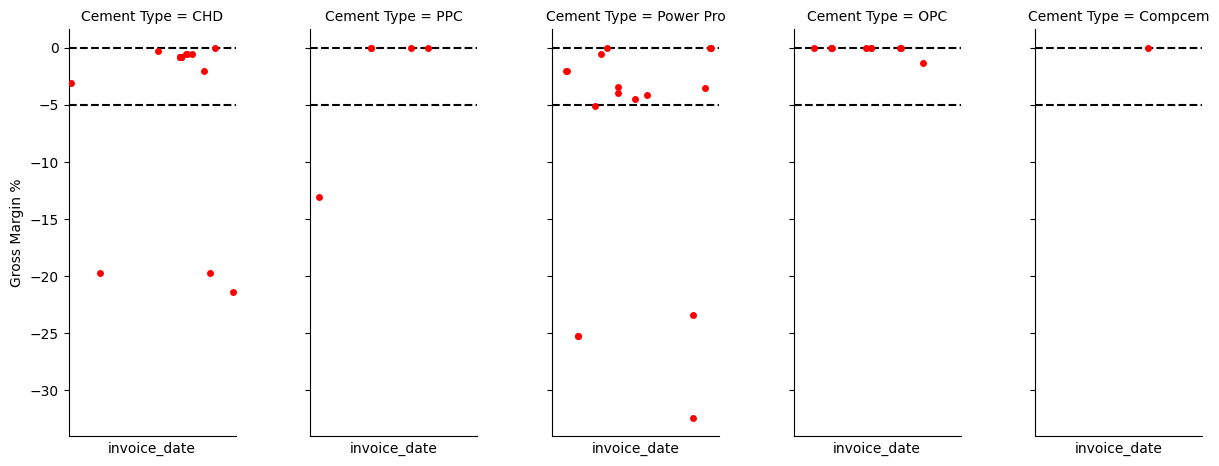

In [ ]:
sns.catplot(data=temp3_df,y='Gross Margin %',x='invoice_date',col='Cement Type', aspect=.5, color = 'red')
for ax in plt.gcf().axes:
    ax.axhline(0, color='black', linestyle='--')
    ax.axhline(-5, color='black', linestyle='--')
    ax.set_xticks([])
plt.show()

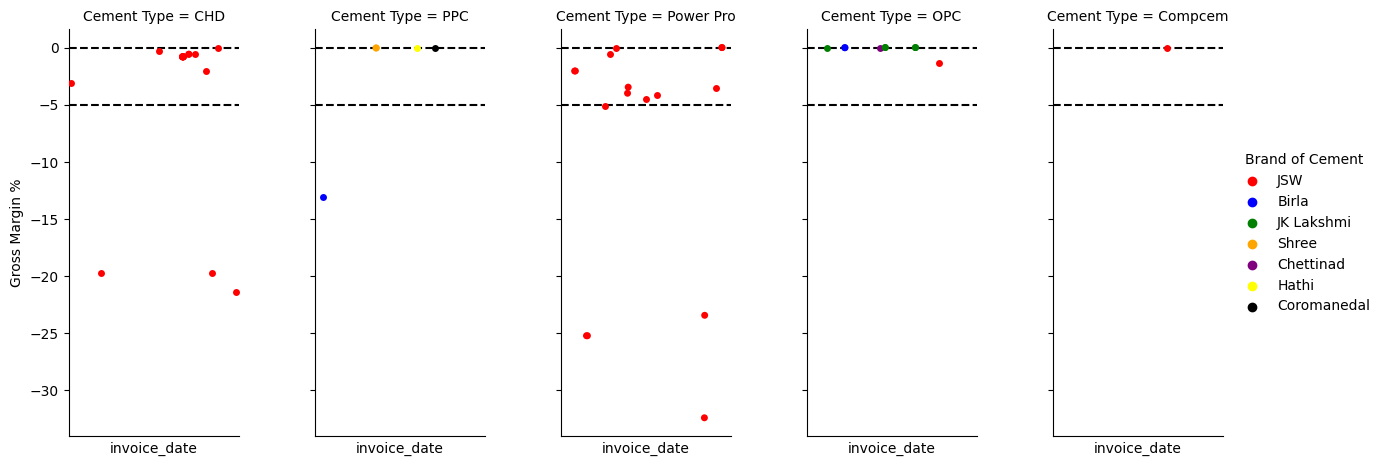

In [ ]:
custom_palette = ['red', 'blue', 'green', 'orange', 'purple',"yellow","black"]
sns.catplot(data=temp3_df,y='Gross Margin %',x='invoice_date',hue='Brand of Cement',col='Cement Type',palette=custom_palette, aspect=.5, color = 'red')
for ax in plt.gcf().axes:
    ax.axhline(0, color='black', linestyle='--')
    ax.axhline(-5, color='black', linestyle='--')
    ax.set_xticks([])
plt.show()

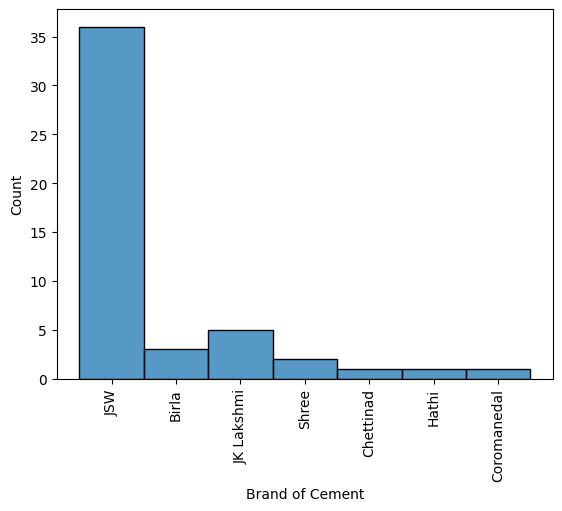

In [ ]:
sns.histplot(temp3_df['Brand of Cement'])
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Cement Type', ylabel='Count'>

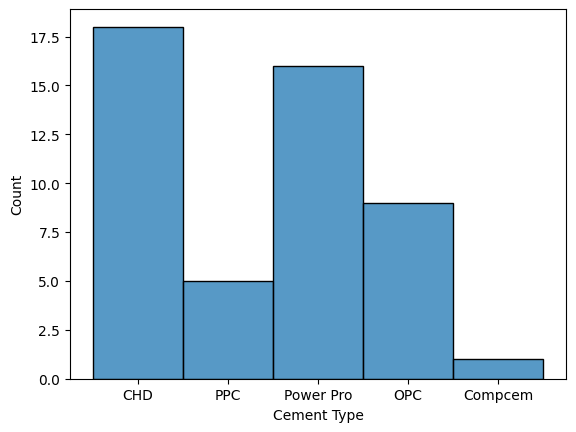

In [ ]:
sns.histplot(temp3_df['Cement Type'])


In [ ]:
temp3_df['invoice_date'].iloc[0]

'1/12/2022'

<ipython-input-203-56e34b9b35d9>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  temp3_df['invoice_date'] = pd.to_datetime(temp3_df['invoice_date'])


<Axes: xlabel='Invoiced Month', ylabel='Count'>

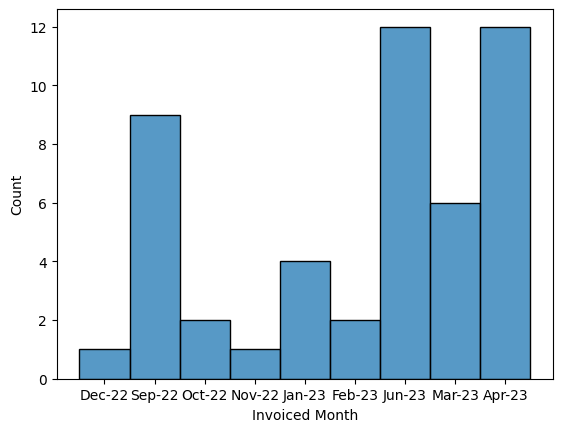

In [ ]:
temp3_df['invoice_date'] = pd.to_datetime(temp3_df['invoice_date'])
temp3_df = temp3_df.sort_values(by = 'invoice_date')
sns.histplot(temp3_df['Invoiced Month'])

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 13.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Brand of Cement', ylabel='Gross Margin %'>

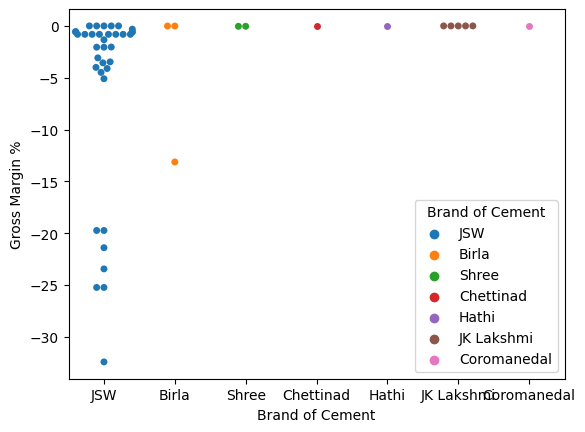

In [ ]:
sns.swarmplot(data=temp3_df,y="Gross Margin %",x='Brand of Cement',hue='Brand of Cement')

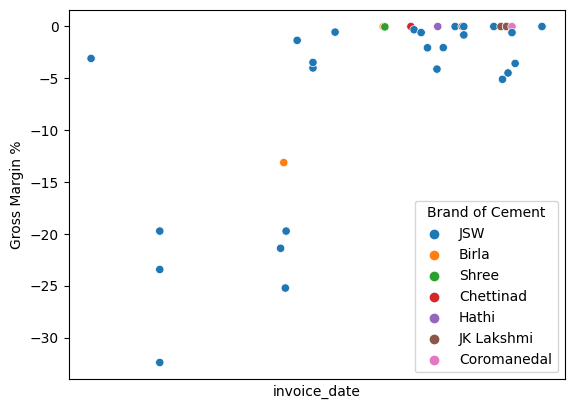

In [ ]:

sns.scatterplot(data=temp3_df,x='invoice_date',y='Gross Margin %',hue='Brand of Cement')
plt.xticks([])
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:red'` for same effect.
  warnings.warn(msg, FutureWarning)


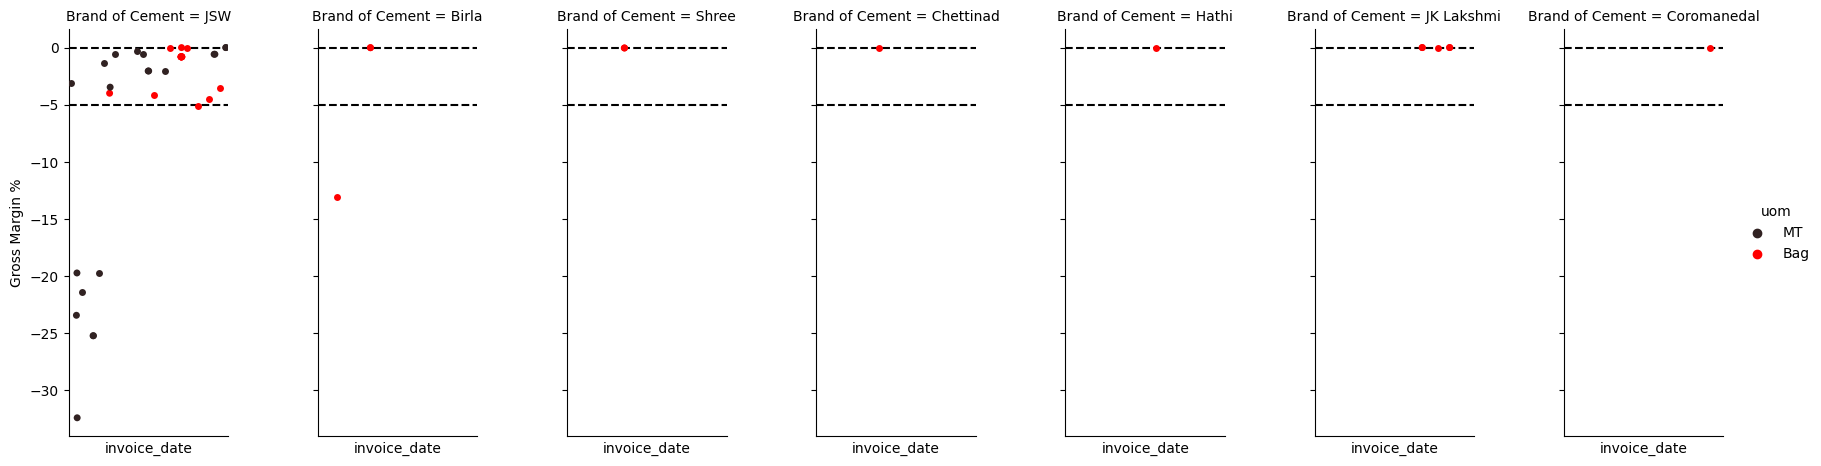

In [ ]:
sns.catplot(data=temp3_df,y='Gross Margin %',x='invoice_date',hue='uom',col='Brand of Cement', aspect=.5, color = 'red')
for ax in plt.gcf().axes:
    ax.axhline(0, color='black', linestyle='--')
    ax.axhline(-5, color='black', linestyle='--')
    ax.set_xticks([])
plt.show()

In [ ]:
print(df[df['Brand of Cement']=="JSW"].data.count())
print(df[df['Brand of Cement']!="JSW"].data.count())

print(temp3_df[temp3_df['Brand of Cement']=="JSW"].data.count())
print(temp3_df[temp3_df['Brand of Cement']!="JSW"].data.count())

846
472
36
13


In [ ]:
df['Cement Type'].unique()

array(['Power Pro', 'CHD', 'PPC', 'OPC', 'Compcem', 'PSC', 'GGBS', nan],
      dtype=object)

In [ ]:
print(df[df['Cement Type']=="Power Pro"].data.count())
print(temp3_df[temp3_df['Cement Type']=="Power Pro"].data.count())

87
16


In [ ]:
print((36/846)*100)
print((13/472)*100)

4.25531914893617
2.754237288135593


In [ ]:
data5=pd.read_csv("AOP - Sheet1.csv",parse_dates=True)
data5=pd.DataFrame(data5)
data5.set_index("Categories",inplace=True)

In [ ]:
data5

,UOM,04/2023,05/2023,06/2023,07/2023,08/2023,09/2023,10/2023,11/2023,12/2023,01/2024,02/2024,03/2024,Total
Categories,,,,,,,,,,,,,,
Sites,Total,"2,240","2,520","2,664","2,935","3,279","3,659","3,964","4,262","4,540","4,780","4,959","5,044","44,846"
Projects,Total,560,816,"1,142","1,512","1,925","2,440","3,243","4,262","5,548","7,171","9,209","11,768","49,596"
Retail,Total,660,"1,020","1,530","1,500","1,515","1,800","2,820","4,140","5,430","6,790","8,220","9,600","45,025"
Total,Total,"3,460","4,356","5,336","5,947","6,719","7,899","10,027","12,664","15,518","18,741","22,388","26,412","139,467"


In [ ]:
data5.drop(["UOM"],axis=1,inplace=True)

In [ ]:
data5["04/2023"]

Categories
Sites       2,240
Projects      560
Retail        660
Total       3,460
Name: 04/2023, dtype: object

In [ ]:
data6=data5.loc["Total",["04/2023","05/2023","06/2023"]]
data6=pd.DataFrame(data6)
data6=data6.sort_values("Total")
print(data6)
data6['Total'] = data6['Total'].str.replace(',', '').astype(int)
print(data6["Total"].dtype)
print(data6.columns)
data6["month"]=data6.index
data6.reset_index(inplace=True, drop=True)
print(data6)

         Total
04/2023  3,460
05/2023  4,356
06/2023  5,336
int64
Index(['Total'], dtype='object')
   Total    month
0   3460  04/2023
1   4356  05/2023
2   5336  06/2023


In [ ]:
monthly_sum = df.groupby('Invoiced Month')['Purchasing Qty (MT)'].sum()
print(monthly_sum)

Invoiced Month
Apr-23     879.9125
Dec-22     249.7350
Feb-23    1018.7165
Jan-23     787.6145
Jul-23     180.0000
Jun-23    3658.1705
Mar-23    1391.4620
May-23    1851.2485
Nov-22     685.0395
Oct-22     657.0905
Sep-22     525.5300
Name: Purchasing Qty (MT), dtype: float64


In [ ]:
monthly_sum = df.groupby('Invoiced Month')['Purchasing Qty (MT)'].sum()
# print(monthly_sum)
data7=pd.DataFrame(monthly_sum)
data8=data7.loc[["Apr-23","May-23","Jun-23"]]
# print(data8.shape)
print(data8.columns)
print(data8['Purchasing Qty (MT)'])
print(data8.index)
data8["month"]=data8.index
data8.reset_index(inplace=True, drop=True)
print(data8)
data8["month"].replace({"Apr-23":"04/2023","May-23":"05/2023","Jun-23":"06/2023"},inplace=True)
print(data8)

Index(['Purchasing Qty (MT)'], dtype='object')
Invoiced Month
Apr-23     879.9125
May-23    1851.2485
Jun-23    3658.1705
Name: Purchasing Qty (MT), dtype: float64
Index(['Apr-23', 'May-23', 'Jun-23'], dtype='object', name='Invoiced Month')
   Purchasing Qty (MT)   month
0             879.9125  Apr-23
1            1851.2485  May-23
2            3658.1705  Jun-23
   Purchasing Qty (MT)    month
0             879.9125  04/2023
1            1851.2485  05/2023
2            3658.1705  06/2023


<Axes: xlabel='month', ylabel='Total'>

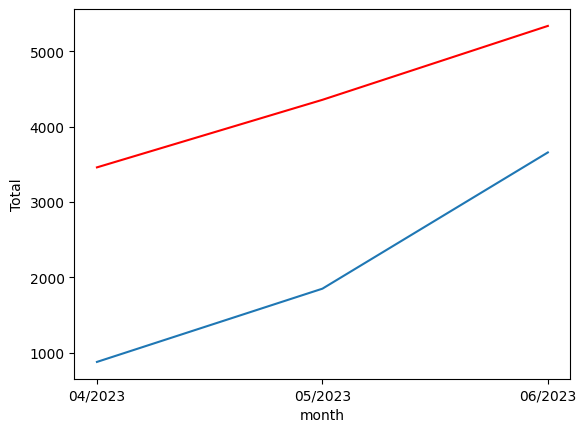

In [ ]:
sns.lineplot(data6["Total"],color="red")
sns.lineplot(y=data8['Purchasing Qty (MT)'],x=data8["month"])